In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [41]:
os.getcwd()

'C:\\Users\\imadh\\Downloads\\New folder'

In [42]:
data = pd.read_csv('breast_cancer_bd.csv')

In [43]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Stage of Cancer,Charge
0,1000025,5,1,1,1,2,1,3,1,1,1,84572.935561
1,1002945,5,4,4,5,7,10,3,2,1,3,132537.676589
2,1015425,3,1,1,1,2,2,3,1,1,1,83790.378723
3,1016277,6,8,8,1,3,4,3,7,1,3,133059.521055
4,1017023,4,1,1,3,2,1,3,1,1,1,84170.762690


In [44]:
print("les diemsions de la BDD : ", data.shape)
print("\n\nla liste des variables : \n", data.columns) 
print("\n\nles types de variables : \n", data.dtypes)

les diemsions de la BDD :  (699, 12)


la liste des variables : 
 Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Stage of Cancer', 'Charge'],
      dtype='object')


les types de variables : 
 Sample code number               int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                     object
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Stage of Cancer                  int64
Charge                         float64
dtype: object


In [45]:
data = data.drop('Sample code number', axis=1)

In [46]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Stage of Cancer,Charge
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,1.925608,107419.887942
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,1.616592,42586.718154
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,61081.379363
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,83400.704431
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,84455.124155
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,3.000000,132904.211981
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,205574.798140


In [47]:
print(data['Bare Nuclei'].unique())

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


In [48]:
data = data.replace('?', np.nan)

data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump Thickness              699 non-null    int64  
 1   Uniformity of Cell Size      699 non-null    int64  
 2   Uniformity of Cell Shape     699 non-null    int64  
 3   Marginal Adhesion            699 non-null    int64  
 4   Single Epithelial Cell Size  699 non-null    int64  
 5   Bare Nuclei                  683 non-null    float64
 6   Bland Chromatin              699 non-null    int64  
 7   Normal Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Stage of Cancer              699 non-null    int64  
 10  Charge                       699 non-null    float64
dtypes: float64(2), int64(9)
memory usage: 60.2 KB


In [49]:
print(data.isnull().sum())

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Stage of Cancer                 0
Charge                          0
dtype: int64


In [50]:
data['Bare Nuclei'] = data['Bare Nuclei'].fillna(data['Bare Nuclei'].median())

In [51]:
print(data.isnull().sum())

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Stage of Cancer                0
Charge                         0
dtype: int64


 # Visualize the Data

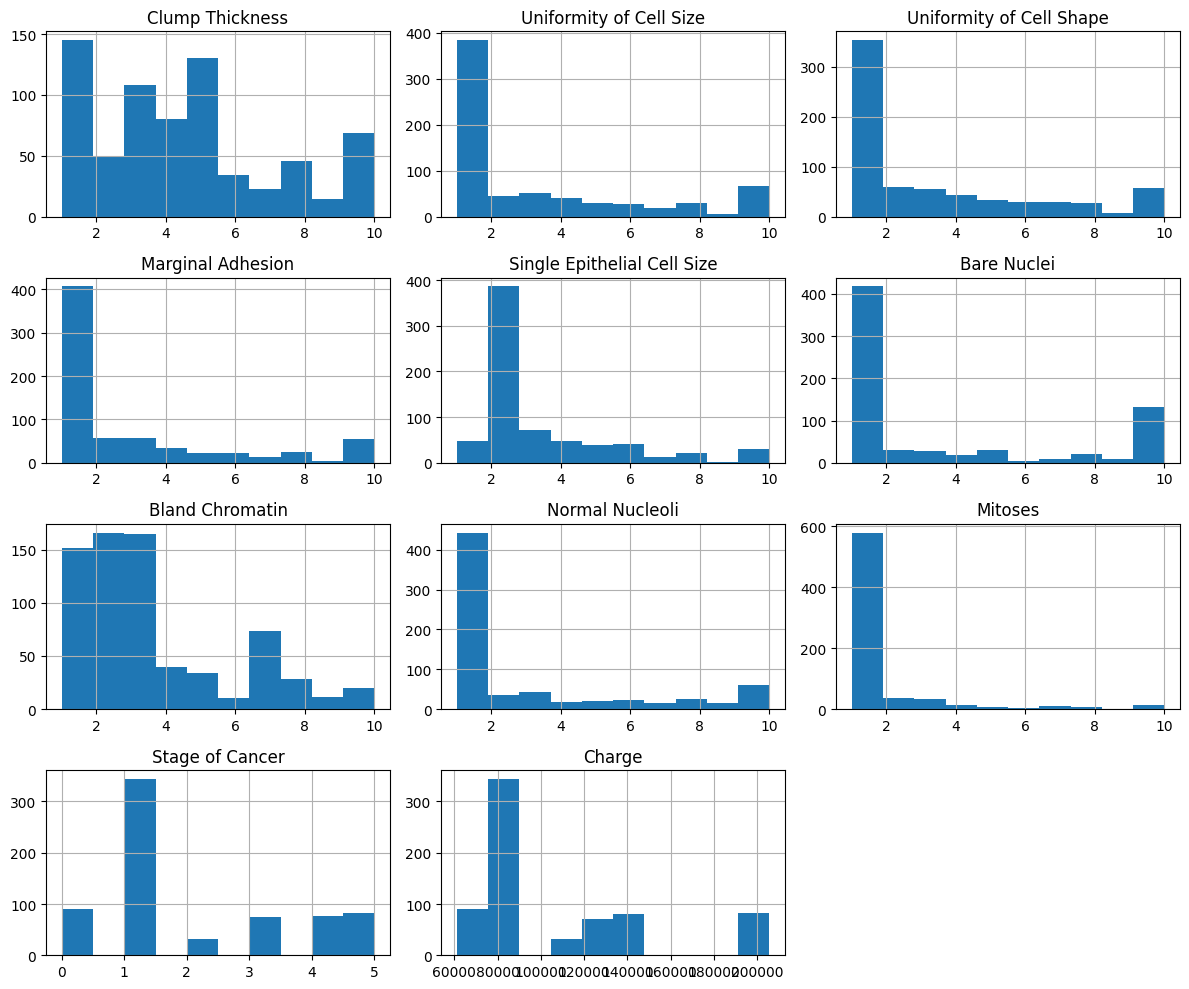

In [52]:
import matplotlib.pyplot as plt

# Plot histograms for each feature
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

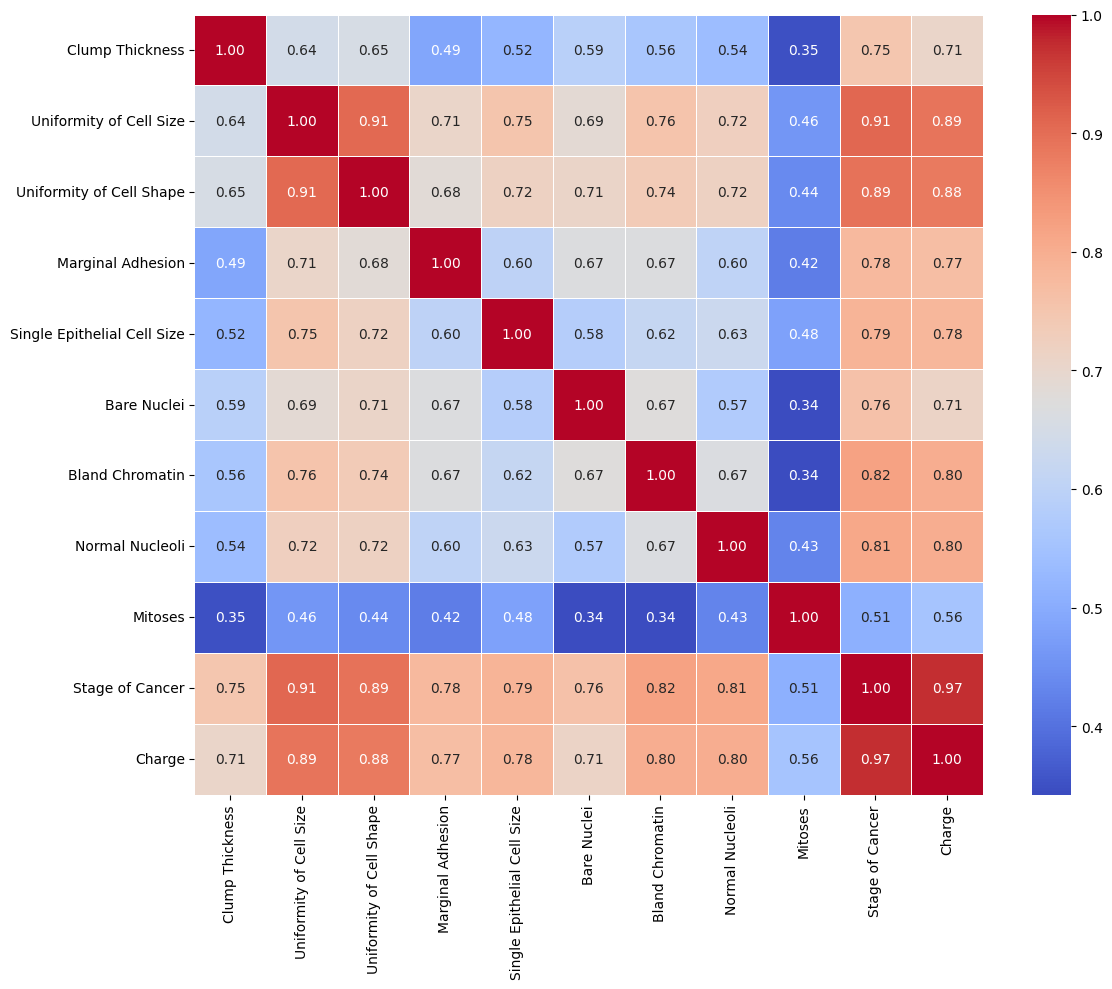

In [53]:
# Correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.tight_layout()
plt.show()

### Interprétation :

1. **Corrélations élevées** :
   - *Uniformité de la taille des cellules* et *Uniformité de la forme des cellules* présentent un coefficient de corrélation élevé de **0.91**, ce qui suggère qu'elles mesurent probablement des aspects très similaires de l'anomalie cellulaire.
   - *Stade du cancer* est fortement corrélé avec *Uniformité de la taille des cellules* (0.91), *Uniformité de la forme des cellules* (0.89) et *Charge* (0.97). Cela indique que ces caractéristiques jouent un rôle important dans la détermination du stade du cancer.
   - *Charge* montre également une forte corrélation avec *Stade du cancer* (0.97), ce qui suggère qu'elle pourrait être étroitement liée à la progression du cancer.

2. **Corrélations modérées** :
   - *Épaisseur des grappes* présente une corrélation modérée avec *Stade du cancer* (0.75) et *Charge* (0.71). Cela suggère que bien que l'épaisseur des grappes soit liée au stade du cancer, elle pourrait ne pas être un prédicteur aussi puissant que d'autres caractéristiques.
   - *Chromatine pâle* présente une corrélation modérée avec *Stade du cancer* (0.82) et *Charge* (0.80), ce qui indique son rôle potentiel dans la détection du cancer.

3. **Corrélations faibles** :
   - *Mitoses* montre généralement une faible corrélation avec la plupart des caractéristiques, y compris *Stade du cancer* (0.51). Cela suggère que le taux de mitoses, à lui seul, pourrait ne pas être un indicateur fort du stade du cancer dans cet ensemble de données.

### Implications pour la prédiction :
   - Des caractéristiques comme *Uniformité de la taille des cellules*, *Uniformité de la forme des cellules*, *Stade du cancer* et *Charge* présentent des corrélations élevées entre elles, ce qui pourrait indiquer de la **multicolinéarité**. Dans un modèle prédictif, il pourrait être bénéfique de sélectionner ou de combiner ces caractéristiques avec soin pour éviter la redondance.
   - Des caractéristiques avec de faibles corrélations, telles que *Mitoses*, pourraient être moins utiles dans le modèle si l'objectif est de prédire le stade du cancer, mais elles pourraient toujours apporter des informations uniques non capturées par d'autres variables.

# Feature Relationships

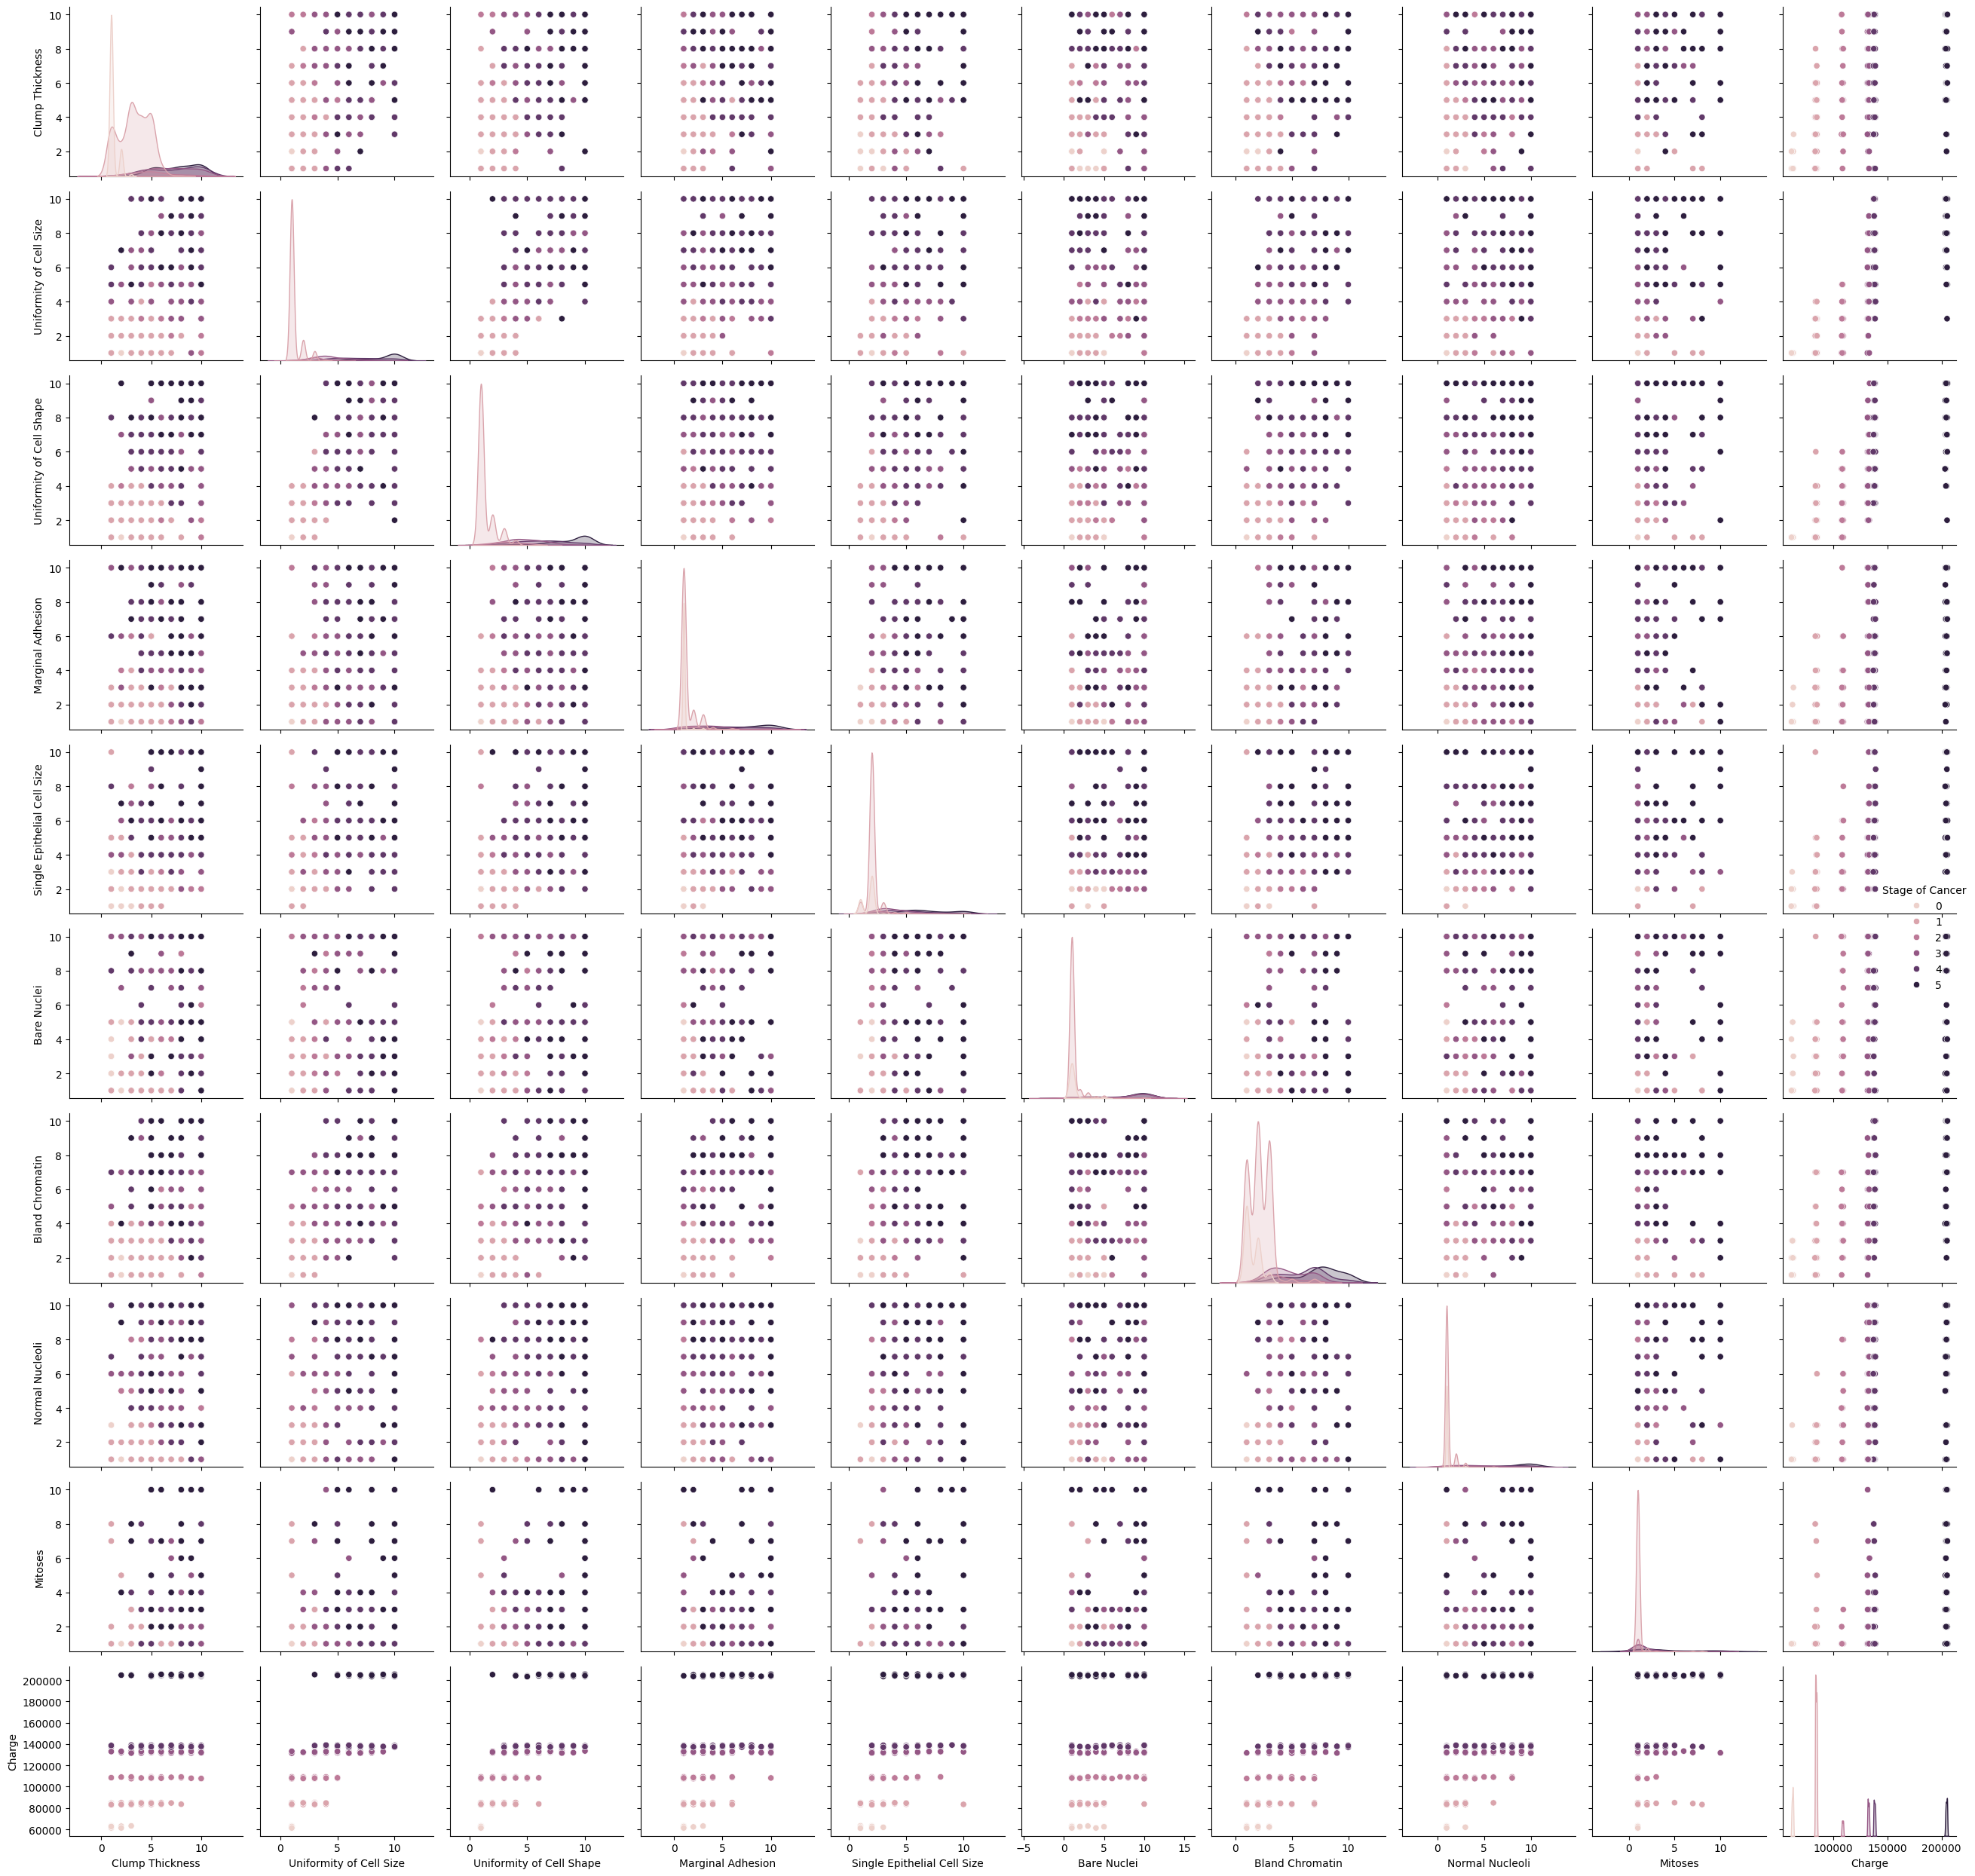

In [54]:
sns.pairplot(data, hue='Stage of Cancer', height=2.5)
plt.tight_layout()
plt.show()

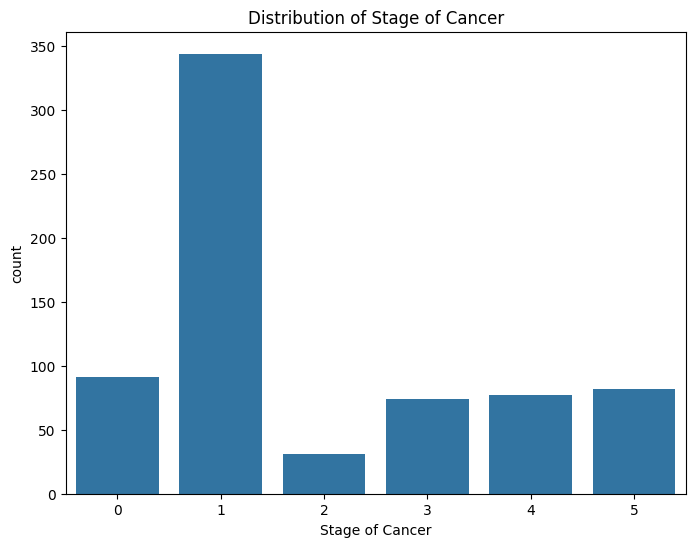

In [55]:
# Count plot for 'Stage of Cancer'
plt.figure(figsize=(8, 6))
sns.countplot(x='Stage of Cancer', data=data)
plt.title('Distribution of Stage of Cancer')
plt.show()


# Prediction du charge  d assurance

In [57]:
data = data.drop('Stage of Cancer', axis=1)

In [58]:
X = data.drop('Charge', axis=1)
y = data['Charge']

In [59]:
scaler_new = StandardScaler()

In [60]:
# Train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet
)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'LASSO Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'Random Forest': RandomForestRegressor(random_state=42),
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    print(f"{name} R^2 score: {score:.4f}")

Linear Regression R^2 score: 0.9032
Ridge Regression R^2 score: 0.9032
LASSO Regression R^2 score: 0.9032
Elastic Net R^2 score: 0.9087
Random Forest R^2 score: 0.9098


In [61]:
# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler_new.fit_transform(X_train)
X_test_scaled = scaler_new.transform(X_test)

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
# Define the ElasticNet model
elastic_net = ElasticNet()

# Create a wider parameter grid for ElasticNet
param_grid = {
    'alpha': np.logspace(-10, 10, 100),  # Wider range of alpha values
    'l1_ratio': np.linspace(0, 1, 11),  # Mix of Lasso (1) and Ridge (0)
}

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=5, 
                           verbose=1, 
                           n_jobs=-1)  # Use all available cores

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Output best parameters and cross-validation score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (MSE): ", -grid_search.best_score_)

# Use the best estimator to make predictions
best_elastic_net = grid_search.best_estimator_
y_pred = best_elastic_net.predict(X_test_scaled)
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Test set MSE: ", mse)

# Calculate R² score
test_score = r2_score(y_test, y_pred)
print("Test Set R^2 Score:", test_score)

Fitting 5 folds for each of 1100 candidates, totalling 5500 fits
Best parameters found:  {'alpha': 0.7924828983539186, 'l1_ratio': 0.9}
Best cross-validation score (MSE):  151325702.23363513
Test set MSE:  136692929.69417048
Test Set R^2 Score: 0.9080664805852825


In [ ]:
# Save the best model and the scaler
joblib.dump(best_elastic_net, 'best_new.joblib')  # Save the best model 
joblib.dump(scaler_new, 'scaler_new.joblib')  # Save the scaler

print("Model and scaler saved successfully.")

Model and scaler saved successfully.


# prediction du stage du cancer

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


<Axes: >

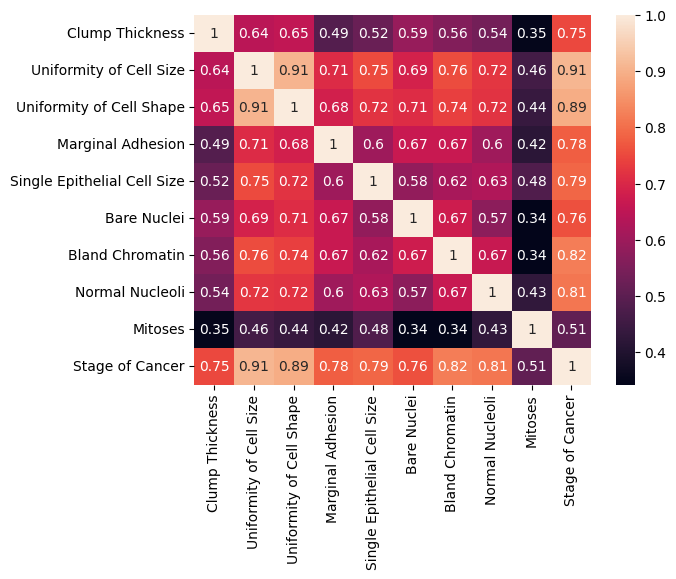

In [68]:
data = pd.read_csv('breast_cancer_bd.csv')
data = data.drop('Sample code number', axis=1)
print(data['Bare Nuclei'].unique())
data = data.replace('?', np.nan)
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'])
data['Bare Nuclei'] = data['Bare Nuclei'].fillna(data['Bare Nuclei'].median())
data = data.drop('Charge', axis=1)
sns.heatmap(data.corr(),annot=True)

In [69]:
X = data.drop('Stage of Cancer', axis=1)
y = data['Stage of Cancer']

In [70]:
stage_scaler = StandardScaler()

In [71]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = stage_scaler.fit_transform(X_train)
X_test_scaled = stage_scaler.transform(X_test)

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import joblib

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train_scaled, y_train)

# Test the model
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.97      0.96      0.97        75
           2       0.67      0.57      0.62         7
           3       0.81      0.87      0.84        15
           4       0.82      0.56      0.67        16
           5       0.65      0.92      0.76        12

    accuracy                           0.88       140
   macro avg       0.80      0.80      0.79       140
weighted avg       0.88      0.88      0.88       140



In [73]:
# Save the model
joblib.dump(clf, 'stage_model.joblib')

# Save the scaler
joblib.dump(stage_scaler, 'stage_scaler.joblib')

['stage_scaler.joblib']

# Analyse de modele obetenu

## Elastique net

## Graphique des résidus

Un graphique des résidus aide à évaluer si le modèle présente un quelconque schéma dans ses erreurs. Si le modèle fonctionne bien, les résidus devraient être dispersés de manière aléatoire autour de zéro, sans former de motifs.

Ce graphique permet de visualiser si les résidus (erreurs) sont uniformément répartis autour de zéro, ce qui est l’idéal pour un bon modèle. Un motif dans les résidus suggère que le modèle pourrait ne pas capturer un élément important dans les données.

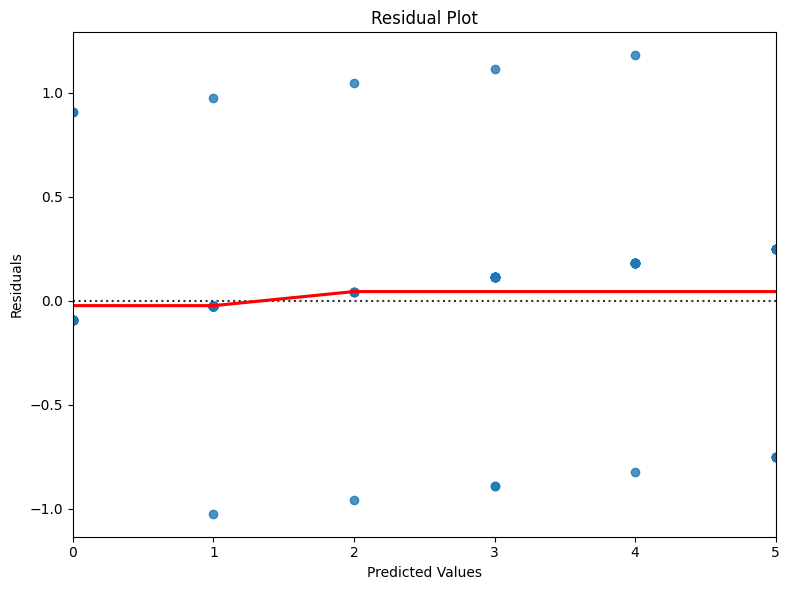

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals (errors)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

## Graphique Prédictions vs Valeurs réelles

Ce graphique compare les valeurs prédites avec les valeurs réelles. Un modèle parfait aurait tous les points situés sur la ligne y=x.

La **ligne rouge en pointillés** représente le cas idéal où les valeurs prédites sont exactement les mêmes que les valeurs réelles. Les points proches de cette ligne indiquent de meilleures prédictions.

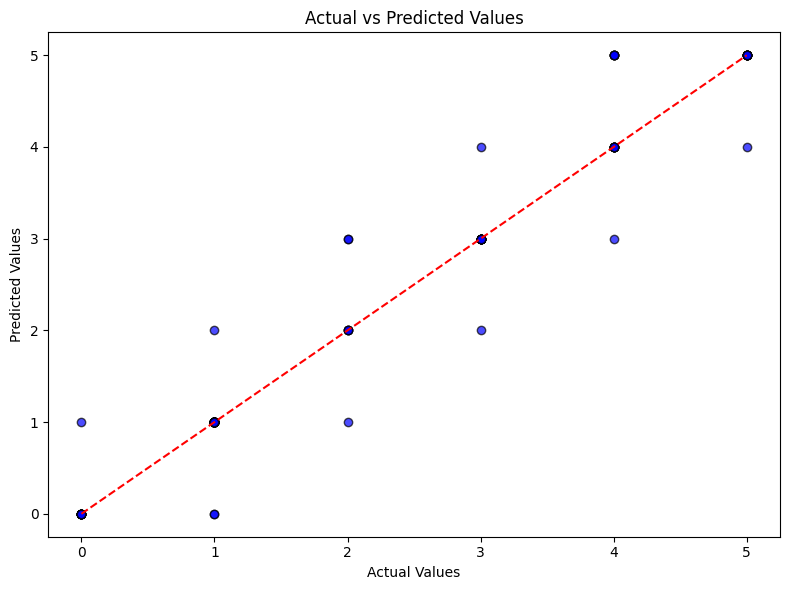

In [76]:
# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

## Residuals Distribution
You can visualize the distribution of the residuals to check for normality 


This helps you assess whether the residuals are normally distributed, which is an assumption of many linear regression models.

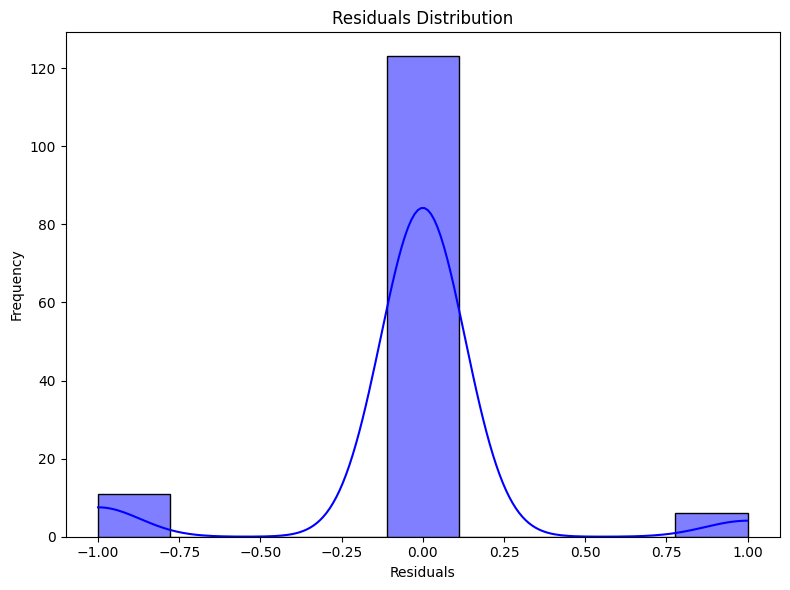

In [77]:
# Plot the distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.tight_layout()
plt.show()

## Learning Curves (Training vs Validation Error)

Learning curves help you understand if the model is overfitting or underfitting by plotting training and validation errors over training epochs. 

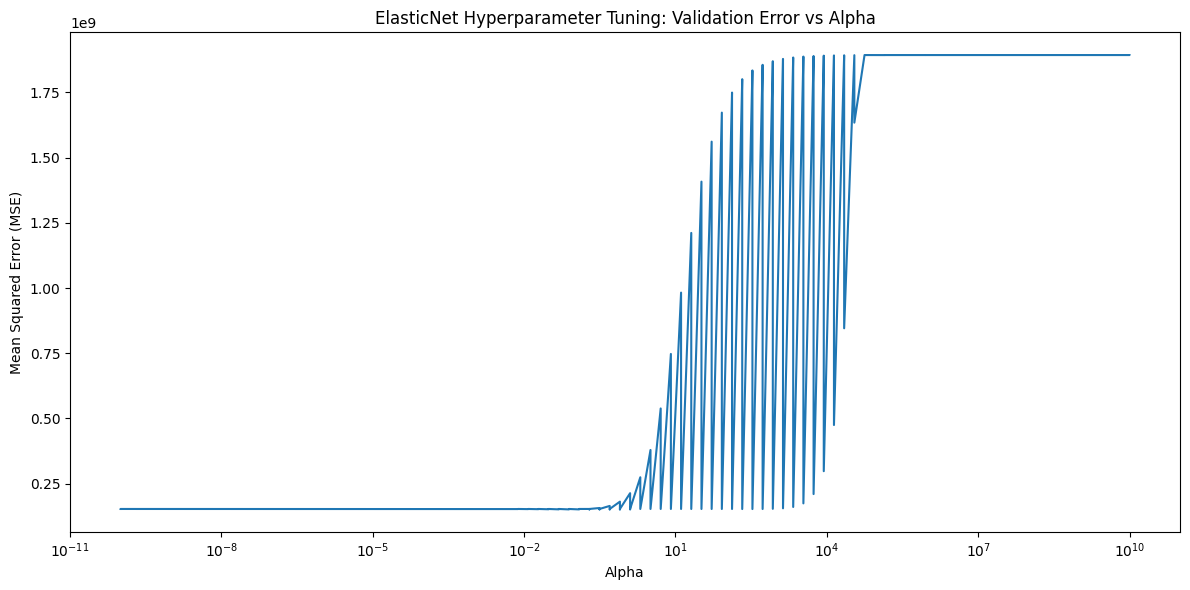

In [78]:
# GridSearchCV already stores the best model's cross-validation results in grid_search.cv_results_
cv_results = grid_search.cv_results_

# Plot the training and validation errors for different alpha and l1_ratio values
plt.figure(figsize=(12, 6))
plt.plot(cv_results['param_alpha'], -cv_results['mean_test_score'], label='Validation Error')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('ElasticNet Hyperparameter Tuning: Validation Error vs Alpha')
plt.tight_layout()
plt.show()

## Feature Importance Visualization
ElasticNet assigns weights (coefficients) to each feature. 

You can visualize the importance of each feature based on the coefficients of the model.

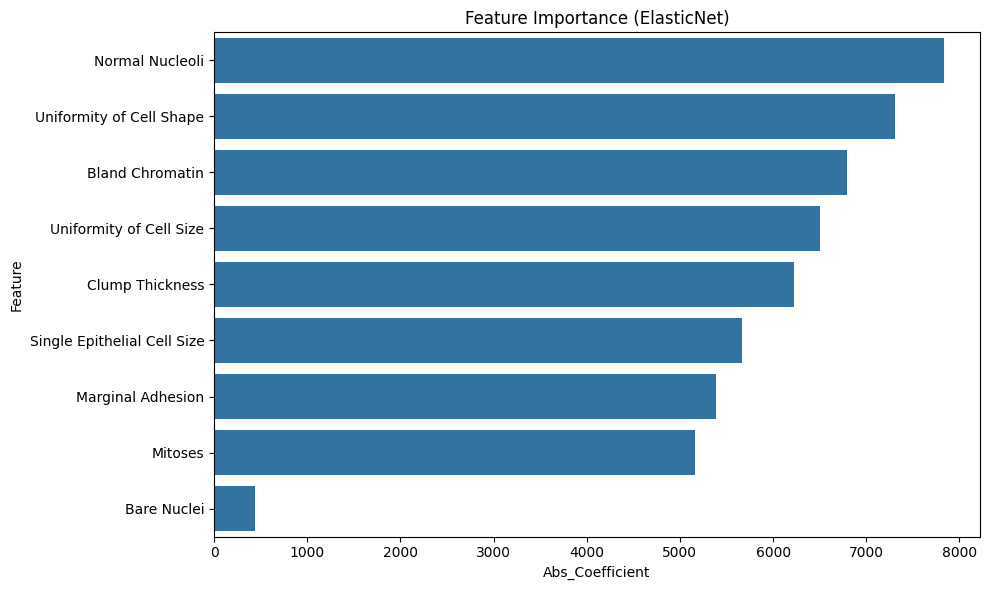

In [80]:
# Get feature names and coefficients
features = X.columns
coefficients = best_elastic_net.coef_

# Create a DataFrame of features and their coefficients
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Sort features by absolute coefficient value
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance (ElasticNet)')
plt.tight_layout()
plt.show()

## Validation Curve (Learning Curve)
You can also visualize how the model's performance changes as we change key parameters 

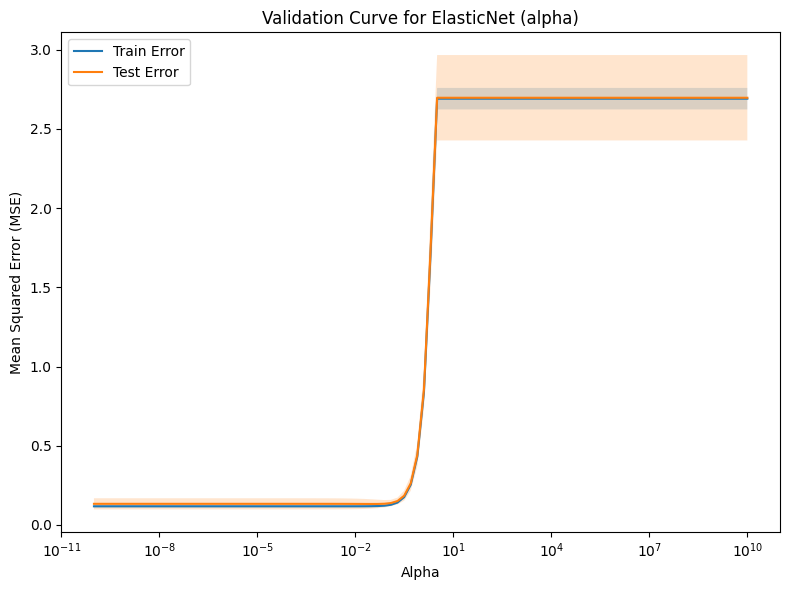

In [82]:
# Validation curve for alpha
from sklearn.model_selection import validation_curve

param_range = np.logspace(-10, 10, 100)
train_scores, test_scores = validation_curve(
    ElasticNet(), X_train_scaled, y_train, param_name="alpha", param_range=param_range, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Calculate mean and std deviation for training and test scores
train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plot the validation curve
plt.figure(figsize=(8, 6))
plt.semilogx(param_range, train_mean, label='Train Error')
plt.semilogx(param_range, test_mean, label='Test Error')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Validation Curve for ElasticNet (alpha)')
plt.legend()
plt.tight_layout()
plt.show()


# RandomForestClassifier

## Feature Importance (Bar Plot)

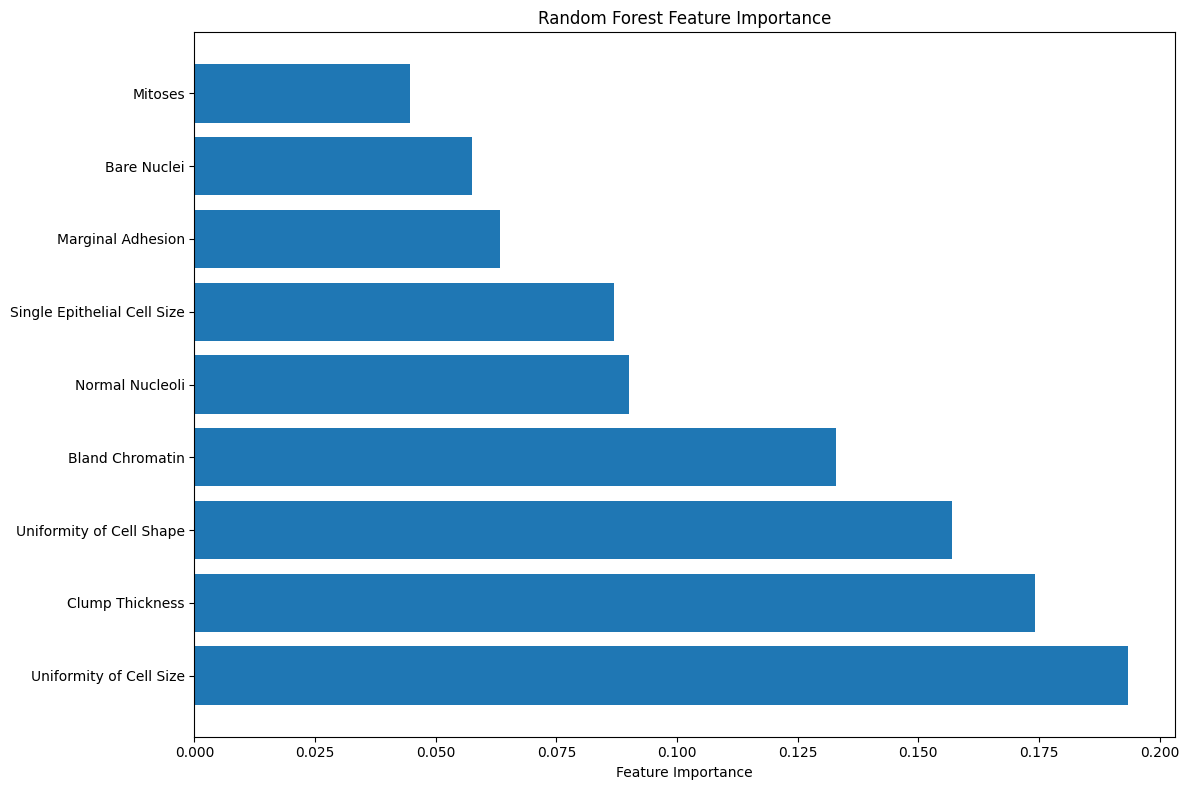

In [90]:
# Feature importance plot
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Random Forest Feature Importance')
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

## Cumulative Gain / Lift Curve
The cumulative gain curve shows the percentage of positive instances captured as you move through the predicted probability list. This is useful for evaluating how well your model ranks instances by probability.

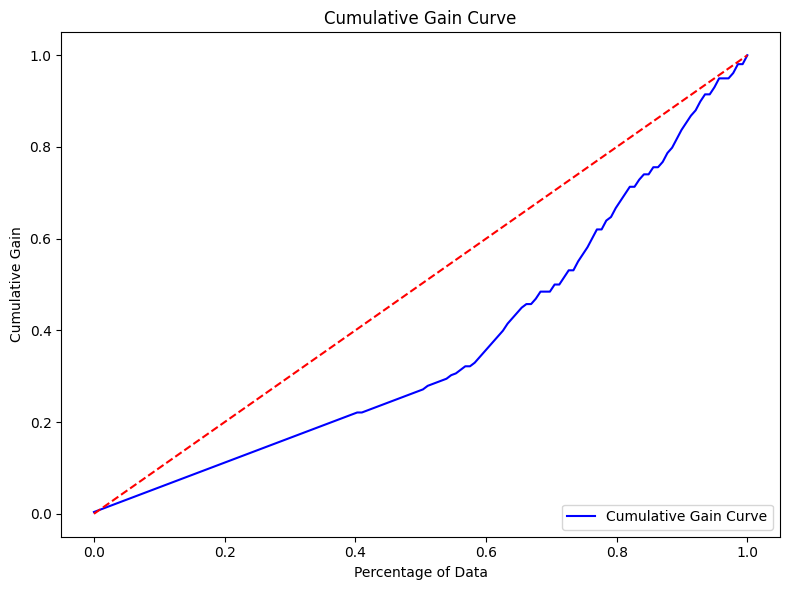

In [91]:
from sklearn.metrics import roc_auc_score

# Get probabilities
probs = clf.predict_proba(X_test_scaled)[:, 1]

# Sort the probabilities and the true values
sorted_indices = np.argsort(probs)[::-1]
sorted_true = y_test.iloc[sorted_indices]

# Calculate cumulative gain
cumulative_gain = np.cumsum(sorted_true) / sorted_true.sum()

# Plot cumulative gain curve
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0, 1, len(sorted_true)), cumulative_gain, label='Cumulative Gain Curve', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Random classifier (baseline)
plt.xlabel('Percentage of Data')
plt.ylabel('Cumulative Gain')
plt.title('Cumulative Gain Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

 ## Validation Curve
A validation curve can help you assess the effect of a hyperparameter 



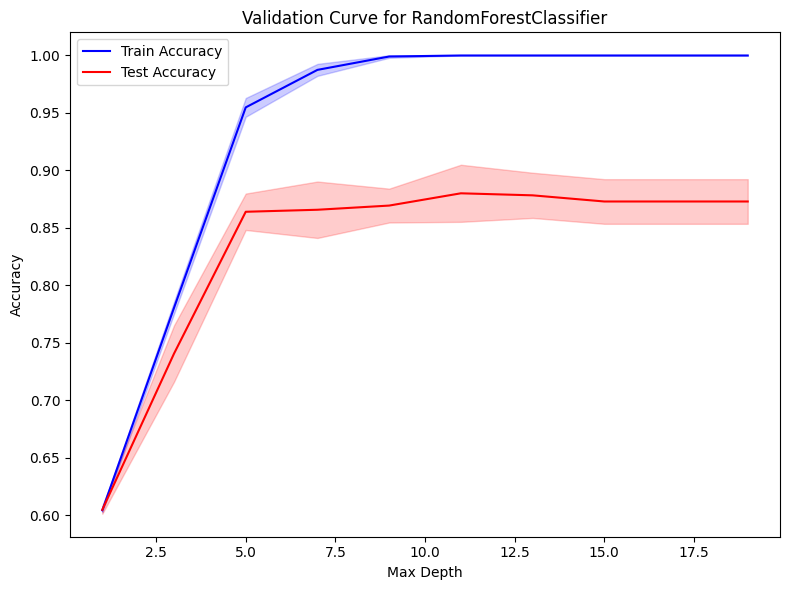

In [93]:
from sklearn.model_selection import validation_curve

param_range = np.arange(1, 21, 2)  # Varying max_depth from 1 to 20
train_scores, test_scores = validation_curve(
    RandomForestClassifier(n_estimators=100, random_state=42),
    X_train_scaled, y_train, param_name="max_depth", param_range=param_range,
    cv=5, scoring='accuracy', n_jobs=-1
)

# Calculate mean and std for training and test scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plot the validation curve
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, label='Train Accuracy', color='blue')
plt.plot(param_range, test_mean, label='Test Accuracy', color='red')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color='red')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Validation Curve for RandomForestClassifier')
plt.legend()
plt.tight_layout()
plt.show()